In [11]:
%matplotlib inline
from simulation import *

In [12]:
def findSet2(myG,myCenterNode,myMaxDeg):
    curSet = set()
    curDeg = myMaxDeg
    while(curDeg>0):
        tempoSet = set(findNeighDegN(myG,myCenterNode,curDeg))
        curSet = curSet.union(tempoSet)
        curDeg -= 1
    return curSet

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [32, 25, 35, 24, 39] 
Slist :  

[45]


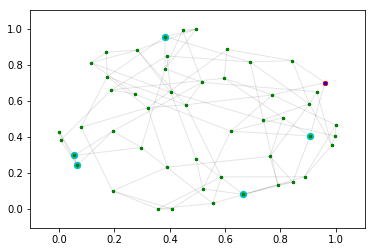

Starting infection


NameError: name 'isAllInfected' is not defined

In [13]:
figureList = list()
# Parameters definition
numRumors = 3
maxThreshold = 1
numMonitors = 5
propagProba = 1
numNodes = 50
linkProba = 0.2
monitorTrigger = list()
numStep = 100


j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')

print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)

In [4]:
sets = list()
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))
for i in range(int(len(monitorTrigger2)/numRumors)):
    set1 =findSet(Graph,monitorTrigger2[i*numRumors][0],monitorTrigger2[i*numRumors][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    printMonitorTrig(monitorTrigger)
    print('\n\nDifferent sets')
    print(*sets,sep='\n')

TypeError: descriptor 'intersection' of 'set' object needs an argument

Real Source =  37
Detected Source =  [37]


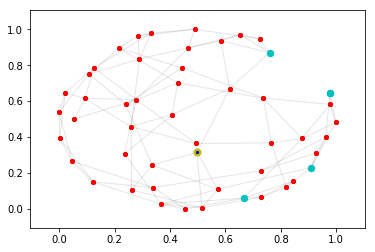

In [62]:
from networkUtils import drawColoredGraph2

setList = []


for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

In [41]:
A = nx.adjacency_matrix(Graph)

  (0, 1)	1
  (0, 2)	1
  (0, 48)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 37)	1
  (1, 42)	1
  (1, 49)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (3, 36)	1
  (3, 45)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (4, 34)	1
  (4, 40)	1
  :	:
  (44, 45)	1
  (44, 46)	1
  (45, 3)	1
  (45, 20)	1
  (45, 43)	1
  (45, 44)	1
  (45, 46)	1
  (46, 11)	1
  (46, 42)	1
  (46, 44)	1
  (46, 45)	1
  (46, 48)	1
  (47, 16)	1
  (47, 42)	1
  (47, 48)	1
  (47, 49)	1
  (48, 0)	1
  (48, 46)	1
  (48, 47)	1
  (48, 49)	1
  (49, 1)	1
  (49, 7)	1
  (49, 33)	1
  (49, 47)	1
  (49, 48)	1
